In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from prophet import Prophet
from prophet.plot import plot_components_plotly, plot_plotly

Importing plotly failed. Interactive plots will not work.


In [2]:
df = pd.read_csv("Data/Daily Temp Data.csv")

In [3]:
df.head()

,DATE,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
0,1/1/2014,33.0,46.0,40.0,657,1756
1,1/2/2014,35.0,50.0,43.0,657,1756
2,1/3/2014,36.0,45.0,41.0,657,1757
3,1/4/2014,32.0,41.0,37.0,658,1757
4,1/5/2014,24.0,38.0,31.0,658,1758


In [4]:
df = df[['DATE',"AvgTemp"]]

we found null values 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   DATE     1825 non-null   object 
 1   AvgTemp  1821 non-null   float64
dtypes: float64(1), object(1)
memory usage: 28.6+ KB


In [6]:
df[df["AvgTemp"].isna()]

,DATE,AvgTemp
136,5/17/2014,NaN
840,4/20/2016,NaN
1204,4/19/2017,NaN
1752,10/19/2018,NaN


filling na values by mean

In [7]:
df.fillna(df['AvgTemp'].mean(), inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   DATE     1825 non-null   object 
 1   AvgTemp  1825 non-null   float64
dtypes: float64(1), object(1)
memory usage: 28.6+ KB


Date format is object we are changing it to datetime format

In [9]:
df['DATE'] = pd.to_datetime(df["DATE"])

In [10]:
df.head()

,DATE,AvgTemp
0,2014-01-01,40.0
1,2014-01-02,43.0
2,2014-01-03,41.0
3,2014-01-04,37.0
4,2014-01-05,31.0


In [14]:
df.columns = ['ds', 'y']
df.head()

,ds,y
0,2014-01-01,40.0
1,2014-01-02,43.0
2,2014-01-03,41.0
3,2014-01-04,37.0
4,2014-01-05,31.0


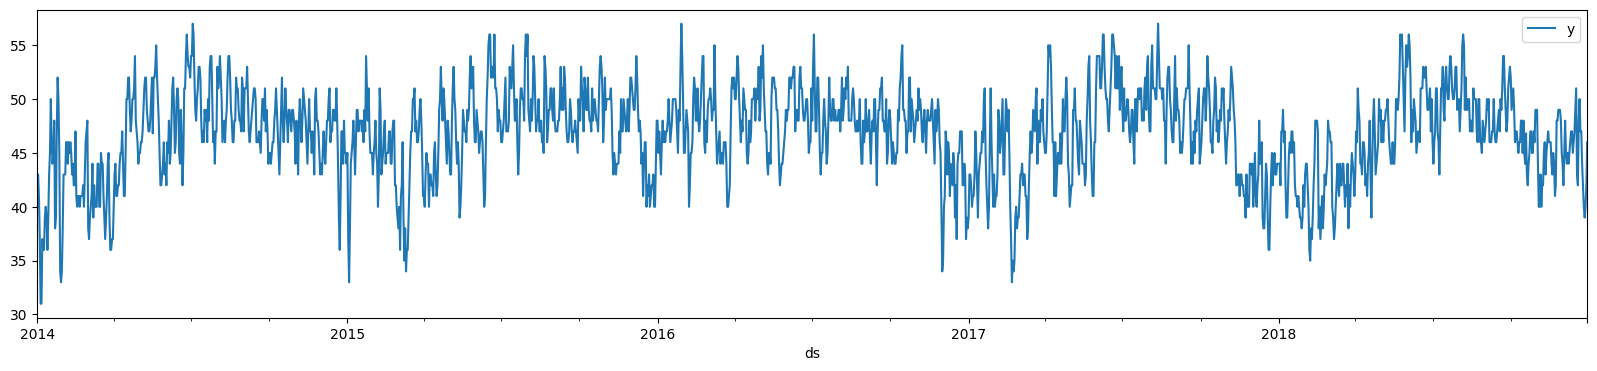

In [16]:
df.plot(x = "ds", y ='y', figsize = (20,4))
plt.show()

In [ ]:
train = df.loc

we can create future dates/dataframe as well